Here are the parameters for a particular simulation of the Black--Scholes equation.

In [1]:
Smax = 8;  T = 6;
K = 3;  sigma = 0.06;  r = 0.08;

We discretize space and time.

In [2]:
m = 200;  h = Smax / m;
x = h*(0:m)
n = 1000;  tau = T / n;
t = tau*(0:n)
lambda = tau / h^2;  mu = tau / h;

Set the initial condition, then march forward in time. 

In [3]:
V = zeros(m+1,n+1)
V[:,1] = @. max( 0, x-K )
for j = 1:n
    # Fictitious value from Neumann condition.
    Vfict = 2*h + V[m,j]
    Vj = [ V[:,j]; Vfict ]
    # First row is zero by the Dirichlet condition.
    for i = 2:m+1 
        diff1 = (Vj[i+1] - Vj[i-1])
        diff2 = (Vj[i+1] - 2*Vj[i] + Vj[i-1])
        V[i,j+1] = Vj[i] +
            (lambda*sigma^2*x[i]^2/2)*diff2 +
            (r*x[i]*mu)/2*diff1 - r*tau*Vj[i]
    end   
end

We plot at a few times.

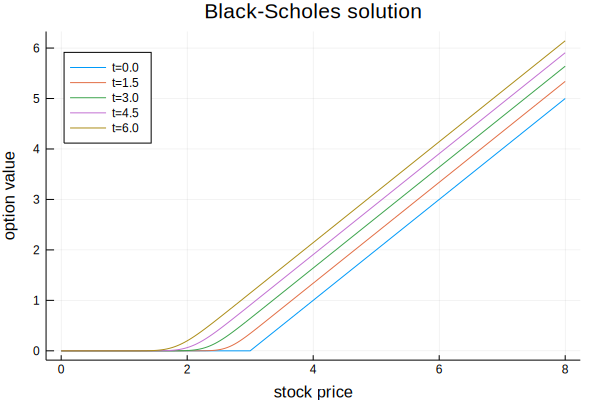

In [4]:
select_times = @. 1 + 250*(0:4)
show_times = t[select_times]

using Plots
plot(x,V[:,select_times],label=["t=$t" for t in show_times], 
    title="Black-Scholes solution",leg=:topleft,  
    xaxis=("stock price"),yaxis=("option value") )

The lowest curve is the initial condition, and the highest curve is the last time. The results are easy to interpret, recalling that the time variable really means "time before strike." Say you are close to the option's strike time. If the current stock price is, say, $S=2$, then it's not likely that the stock will end up over the strike price $K=3$ and therefore the option has little value. On the other hand, if presently $S=3$, then there are good odds that the option will be exercised at the strike time, and you will need to pay a substantial portion of the stock price in order to take advantage.

Let's try to extend the simulation time to $T=8$, keeping everything else the same.

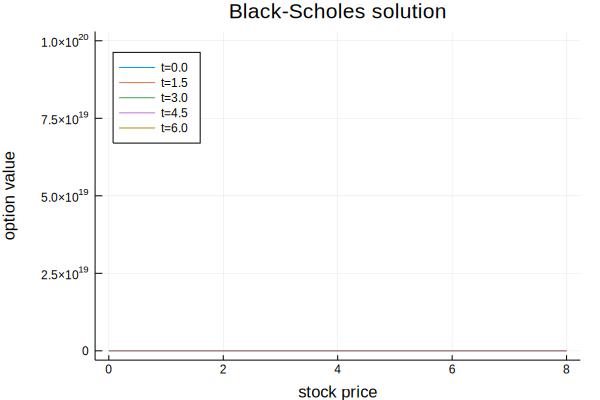

In [5]:
T = 8;
n = 1000;  tau = T / n;
t = tau*(0:n)
lambda = tau / h^2;  mu = tau / h;

for j = 1:n
    # Fictitious value from Neumann condition.
    Vfict = 2*h + V[m,j]
    Vj = [ V[:,j]; Vfict ]
    # First row is zero by the Dirichlet condition.
    for i = 2:m+1 
        diff1 = (Vj[i+1] - Vj[i-1])
        diff2 = (Vj[i+1] - 2*Vj[i] + Vj[i-1])
        V[i,j+1] = Vj[i] +
            (lambda*sigma^2*x[i]^2/2)*diff2 +
            (r*x[i]*mu)/2*diff1 - r*tau*Vj[i]
    end   
end


plot(x,V[:,select_times],label=["t=$t" for t in show_times], 
    title="Black-Scholes solution",leg=:topleft,  
    xaxis=("stock price"),yaxis=("option value",[0,1e20]) )

This "solution" is nonsensical.  Look at the scale of the ordinate!